# Predicting CO2 Emission by countries Using Machine Learning

## Data Preprocessing

### Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter as c
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

### Reading Dataset

In [6]:
data = pd.read_csv('C:/Users/Raghul727/Desktop/CO2-Emission/Indicators.csv')
data.shape

(5656458, 6)

In [7]:
data.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06
5,Arab World,ARB,Arms imports (SIPRI trend indicator values),MS.MIL.MPRT.KD,1960,5.380000e+08
6,Arab World,ARB,"Birth rate, crude (per 1,000 people)",SP.DYN.CBRT.IN,1960,4.769789e+01
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,6.439635e-01
9,Arab World,ARB,CO2 emissions from gaseous fuel consumption (%...,EN.ATM.CO2E.GF.ZS,1960,5.041292e+00


In [8]:
data.tail(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656448,Zimbabwe,ZWE,Strength of legal rights index (0=weak to 12=s...,IC.LGL.CRED.XQ,2015,5.0
5656449,Zimbabwe,ZWE,Tax payments (number),IC.TAX.PAYM,2015,49.0
5656450,Zimbabwe,ZWE,Time required to build a warehouse (days),IC.WRH.DURS,2015,448.0
5656451,Zimbabwe,ZWE,Time required to enforce a contract (days),IC.LGL.DURS,2015,410.0
5656452,Zimbabwe,ZWE,Time required to get electricity (days),IC.ELC.TIME,2015,106.0
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


### Check Unique Values

In [10]:
countryCodes = data['CountryCode'].unique().tolist()
len(countryCodes)

247

In [11]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [12]:
years = data['Year'].unique().tolist()
len(years)

56

In [13]:
print(min(years)," to ",max(years))

1960  to  2015


### CO2 Emissions of Countries

In [15]:
# select CO2 emissions for the Arab
hist_indicator1 = 'CO2 emissions \(metric'
hist_country1 = 'ARB'

mask11 = data['IndicatorName'].str.contains(hist_indicator1)
mask12 = data['CountryCode'].str.contains(hist_country1)

# stage is just those indicators matching the ARB for country code and CO2 emissions over time.
stage1 = data[mask11 & mask12]

In [16]:
stage1.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
23204,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.685501
49821,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.761148
78260,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.875124
106885,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.999248
136012,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,1.166075
168048,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,1.273618
199385,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.333305
232124,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,1.548404
264671,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,1.795446


In [17]:
# select CO2 emissions for the Barbados
hist_indicator2 = 'CO2 emissions \(metric'
hist_country2 = 'BRB'

mask21 = data['IndicatorName'].str.contains(hist_indicator2)
mask22 = data['CountryCode'].str.contains(hist_country2)

# stage is just those indicators matching the BRB for country code and CO2 emissions over time.
stage2 = data[mask21 & mask22]


In [18]:
stage2.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
4812,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.746313
28743,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.838899
55693,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.119411
84086,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.816330
112785,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.766085
142348,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,0.872454
174211,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,1.134077
205826,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.425763
238527,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,1.855151
271222,Barbados,BRB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,2.019146


In [19]:
# select CO2 emissions for the Barbados
hist_indicator3 = 'CO2 emissions \(metric'
hist_country3 = 'IND'

mask31 = data['IndicatorName'].str.contains(hist_indicator3)
mask32 = data['CountryCode'].str.contains(hist_country3)

# stage is just those indicators matching the BRB for country code and CO2 emissions over time.
stage3 = data[mask31 & mask32]

In [20]:
stage3.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900
151960,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,0.333331
183696,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,0.337854
215614,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,0.331763
248229,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,0.353281
281013,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,0.351991


In [21]:
hist_indicator4 = 'CO2 emissions \(metric'
hist_country4 = 'SGP'

mask41 = data['IndicatorName'].str.contains(hist_indicator4) 
mask42 = data['CountryCode'].str.contains(hist_country4)

stage4 = data[mask41 & mask42]

In [22]:
stage4.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
18930,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.846368
44969,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,1.229944
73101,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,1.472918
101695,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,1.893765
130742,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,2.011115
162246,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,1.340945
193732,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,0.348805
226302,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,1.546459
258885,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,2.693750
291835,Singapore,SGP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,3.527860


In [23]:
hist_indicator5 = 'CO2 emissions \(metric'
hist_country5 = 'USA'

mask51 = data['IndicatorName'].str.contains(hist_indicator5) 
mask52 = data['CountryCode'].str.contains(hist_country5)

stage5 = data[mask51 & mask52]

In [24]:
stage5.head(10)

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
22232,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,15.999779
48708,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,15.681256
77087,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,16.013937
105704,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,16.482762
134742,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,16.968119
166672,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,17.451725
198040,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,18.121073
230758,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,18.598318
263313,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,19.089389
296298,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,19.857946


### Understanding Data

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5656458 entries, 0 to 5656457
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   CountryName    object 
 1   CountryCode    object 
 2   IndicatorName  object 
 3   IndicatorCode  object 
 4   Year           int64  
 5   Value          float64
dtypes: float64(1), int64(1), object(4)
memory usage: 258.9+ MB


In [27]:
data.describe()

,Year,Value
count,5.656458e+06,5.656458e+06
mean,1.994464e+03,1.070501e+12
std,1.387895e+01,4.842469e+13
min,1.960000e+03,-9.824821e+15
25%,1.984000e+03,5.566242e+00
50%,1.997000e+03,6.357450e+01
75%,2.006000e+03,1.346722e+07
max,2.015000e+03,1.103367e+16


### Observing Target and Data Columns

In [29]:
np.unique(data.dtypes, return_counts = True)

(array([dtype('int64'), dtype('float64'), dtype('O')], dtype=object),
 array([1, 1, 4], dtype=int64))

In [30]:
cat = data.dtypes[data.dtypes == 'O'].index.values
cat

array(['CountryName', 'CountryCode', 'IndicatorName', 'IndicatorCode'],
      dtype=object)

In [31]:
for i in cat:
    print("Column :", i)
    print('Count of classes :', data[i].unique())
    print(data[i])
    print('*' * 120)

Column : CountryName
Count of classes : ['Arab World' 'Caribbean small states' 'Central Europe and the Baltics'
 'East Asia & Pacific (all income levels)'
 'East Asia & Pacific (developing only)' 'Euro area'
 'Europe & Central Asia (all income levels)'
 'Europe & Central Asia (developing only)' 'European Union'
 'Fragile and conflict affected situations'
 'Heavily indebted poor countries (HIPC)' 'High income'
 'High income: nonOECD' 'High income: OECD'
 'Latin America & Caribbean (all income levels)'
 'Latin America & Caribbean (developing only)'
 'Least developed countries: UN classification' 'Low & middle income'
 'Low income' 'Lower middle income'
 'Middle East & North Africa (all income levels)'
 'Middle East & North Africa (developing only)' 'Middle income'
 'North America' 'OECD members' 'Other small states'
 'Pacific island small states' 'Small states' 'South Asia'
 'Sub-Saharan Africa (all income levels)'
 'Sub-Saharan Africa (developing only)' 'Upper middle income' 'World'
 'A

In [32]:
data.dtypes[data.dtypes != 'O'].index.values

array(['Year', 'Value'], dtype=object)

### Missing Data

In [34]:
data.isnull().sum()

CountryName      0
CountryCode      0
IndicatorName    0
IndicatorCode    0
Year             0
Value            0
dtype: int64

In [35]:
data.isnull().any()

CountryName      False
CountryCode      False
IndicatorName    False
IndicatorCode    False
Year             False
Value            False
dtype: bool

In [36]:
# for x in data["IndicatorName"].unique():
#     if x not in ["CO2 emissions (kt)","CO2 emissions (metric tons per capita)","CO2 emissions from gaseous fuel consumption (% of total)","CO2 emissions from liquid fuel consumption (% of total)","CO2 emissions from liquid fuel consumption (kt)","CO2 emissions from solid fuel consumption (% of total)"]:
#         data = data.drop(data[data['IndicatorName'] == x].index)

### Data Visualisation

In [38]:
# Let us take India as our first country of comparison
stage = stage3

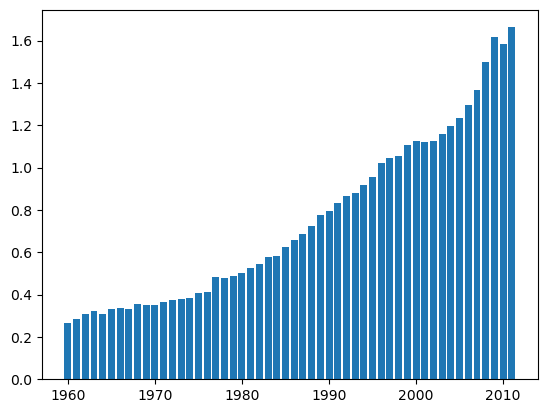

In [39]:
# get the years
years = stage['Year'].values
# get the values 
co2 = stage['Value'].values

# create
plt.bar(years,co2)
plt.show()

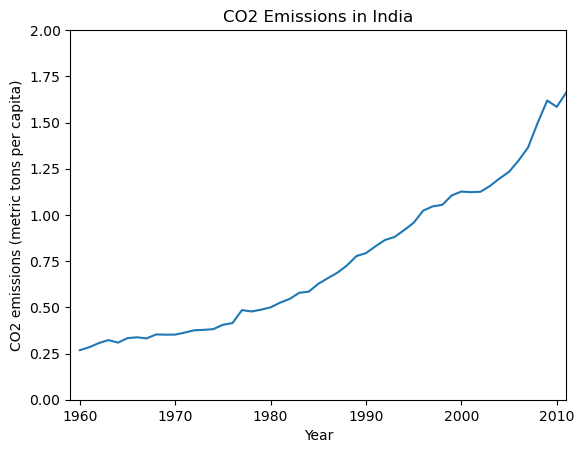

In [40]:
# switch to a line plot
plt.plot(stage['Year'].values, stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(stage['IndicatorName'].iloc[0])

#label the figure
plt.title('CO2 Emissions in India')

# to make more honest, start they y axis at 0
plt.axis([1959, 2011,0,2])
#plt.plot(stage['Year'].values, stage['Value'].values)

plt.show()

In [41]:
# Otherwise, let's look at all the data
hist_data = stage['Value'].values

In [42]:
print(len(hist_data))

52


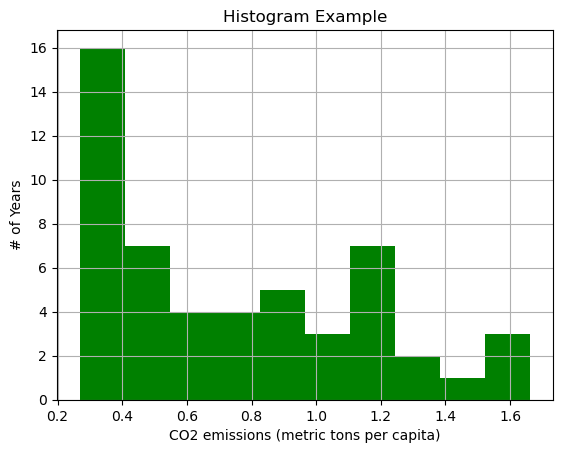

In [43]:
# the histogram of the data
plt.hist(hist_data, 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Years')
plt.title('Histogram Example')

plt.grid(True)

plt.show()

In [44]:
# select CO2 emissions for all countries in 2011
hist_indicator = 'CO2 emissions \(metric'
hist_year = 2011

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['Year'].isin([hist_year])

# apply our mask
co2_2011 = data[mask1 & mask2]
co2_2011.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5026275,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,4.724500
5026788,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,9.692960
5027295,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,6.911131
5027870,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.859548
5028456,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,2011,5.302499


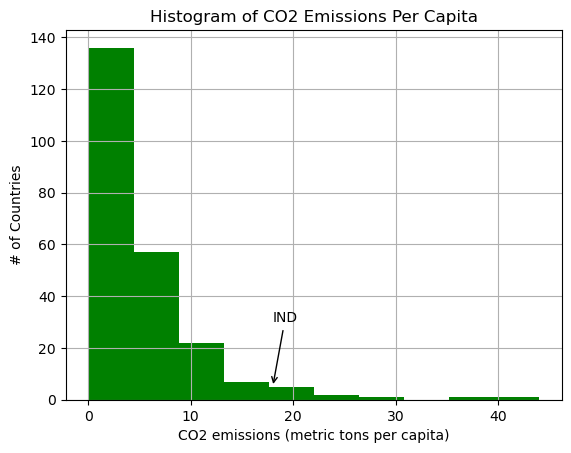

In [45]:
# let's plot a histogram of the emmissions per capita by country

# subplots returns a touple with the figure, axis attributes.
fig, ax = plt.subplots()

ax.annotate("IND",
            xy=(18, 5), xycoords='data',
            xytext=(18, 30), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
            )

plt.hist(co2_2011['Value'], 10, density=False, facecolor='green')

plt.xlabel(stage['IndicatorName'].iloc[0])
plt.ylabel('# of Countries')
plt.title('Histogram of CO2 Emissions Per Capita')

#plt.axis([10, 22, 0, 14])
plt.grid(True)

plt.show()

In [46]:
# select GDP Per capita emissions for India
hist_indicator = 'GDP per capita \(constant 2005'
hist_country = 'IND'

mask1 = data['IndicatorName'].str.contains(hist_indicator) 
mask2 = data['CountryCode'].str.contains(hist_country)

# stage is just those indicators matching the USA for country code and CO2 emissions over time.
gdp_stage = data[mask1 & mask2]

#plot gdp_stage vs stage

In [47]:
gdp_stage.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11616,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1960,228.304470
36555,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1961,232.142053
64095,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1962,234.166685
92540,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1963,243.176418
121337,India,IND,GDP per capita (constant 2005 US$),NY.GDP.PCAP.KD,1964,255.963668


In [48]:
stage

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
11577,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.268161
36513,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1961,0.284292
64049,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1962,0.306519
92493,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1963,0.322533
121290,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1964,0.308900
151960,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1965,0.333331
183696,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1966,0.337854
215614,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1967,0.331763
248229,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1968,0.353281
281013,India,IND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1969,0.351991


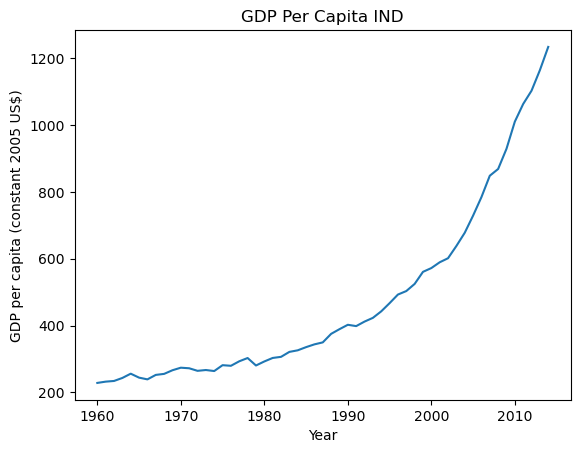

In [49]:
# switch to a line plot
plt.plot(gdp_stage['Year'].values, gdp_stage['Value'].values)

# Label the axes
plt.xlabel('Year')
plt.ylabel(gdp_stage['IndicatorName'].iloc[0])

#label the figure
plt.title('GDP Per Capita IND')

# to make more honest, start they y axis at 0
#plt.axis([1959, 2011,0,25])

plt.show()

In [50]:
print("CO2 Min Year = ", stage['Year'].min(), "max: ", stage['Year'].max())

CO2 Min Year =  1960 max:  2011


In [51]:
gdp_stage_trunc = gdp_stage[gdp_stage['Year'] < 2012]
print(len(gdp_stage_trunc))
print(len(stage))

52
52


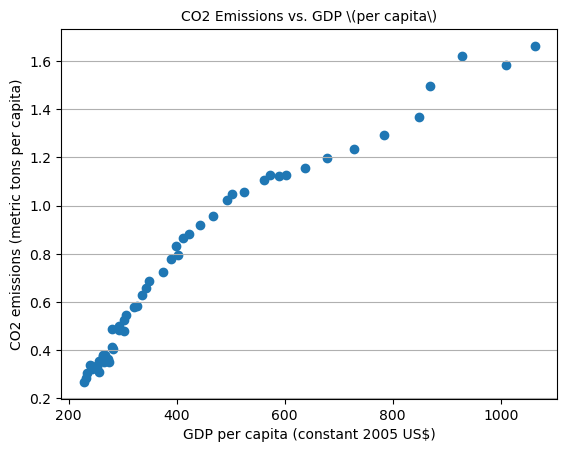

In [52]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('CO2 Emissions vs. GDP \(per capita\)',fontsize=10)
axis.set_xlabel(gdp_stage_trunc['IndicatorName'].iloc[10],fontsize=10)
axis.set_ylabel(stage['IndicatorName'].iloc[0],fontsize=10)

X = gdp_stage_trunc['Value']
Y = stage['Value']

axis.scatter(X, Y)
plt.show()

In [53]:
np.corrcoef(gdp_stage_trunc['Value'],stage['Value'])

array([[1.        , 0.96753758],
       [0.96753758, 1.        ]])

### Label Encoding

In [55]:
le = LabelEncoder()
data = data.drop(['IndicatorCode', 'CountryCode'] ,axis=1) 
data = pd.DataFrame(data)

In [56]:
cat = data.dtypes[data.dtypes == 'O'].index.values
for i in cat:
    data[i] = le.fit_transform(data[i])

In [57]:
data = pd.DataFrame(data)

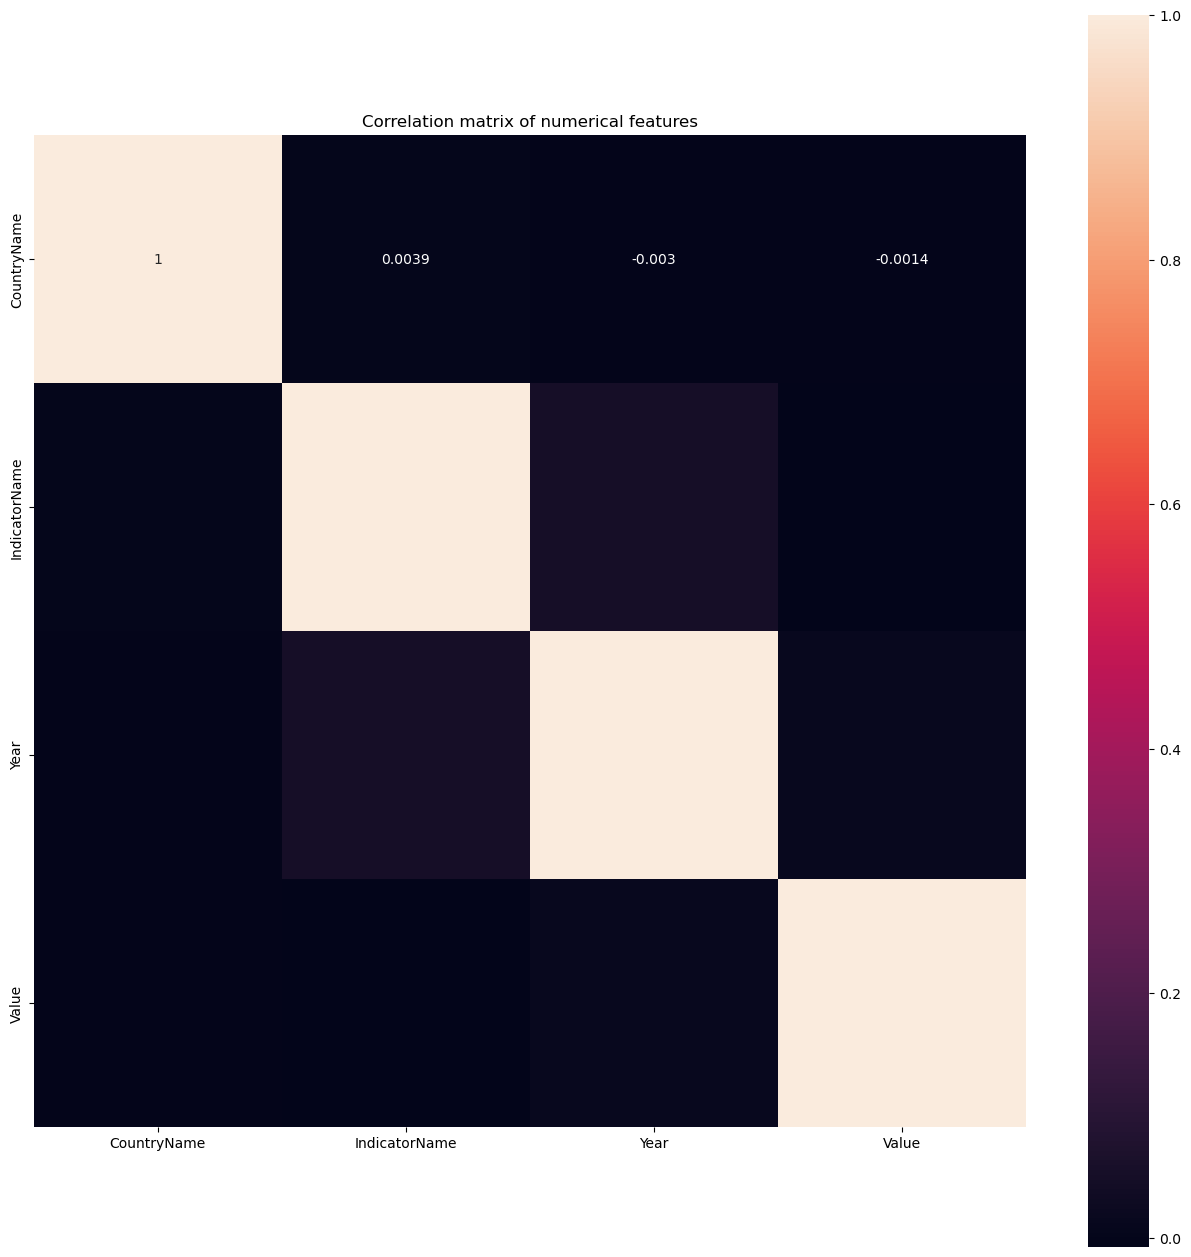

In [58]:
corr = data.corr()
plt.subplots(figsize=(16, 16))
sns.heatmap(corr, annot=True, square=True)
plt.title("Correlation matrix of numerical features")
plt.show()

In [59]:
data

,CountryName,IndicatorName,Year,Value
0,7,44,1960,1.335609e+02
1,7,48,1960,8.779760e+01
2,7,49,1960,6.634579e+00
3,7,50,1960,8.102333e+01
4,7,90,1960,3.000000e+06
...,...,...,...,...
5656453,246,1258,2015,3.600000e+01
5656454,246,1259,2015,9.000000e+01
5656455,246,1263,2015,2.420000e+02
5656456,246,1264,2015,3.300000e+00


### Splitting Dataset

In [61]:
x = data.drop(['Value'] ,axis=1) 
x=pd.DataFrame(x)
y = data['Value'] 
y=pd.DataFrame (y)

In [62]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
print(x_train.shape)
print(x_test.shape)

(4525166, 3)
(1131292, 3)


In [63]:
x_train

,CountryName,IndicatorName,Year
1916062,44,1268,1990
918922,183,393,1978
2654734,33,533,1996
5337767,183,186,2012
2284992,74,28,1993
...,...,...,...
2249467,210,540,1993
5157699,177,320,2011
2215104,200,822,1992
1484405,125,845,1985


## Model Building

In [65]:
model = RandomForestRegressor(n_estimators=10,random_state=52,n_jobs=-1,verbose=2)

In [66]:
model.fit(x_train, y_train.values.ravel())

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:   36.7s remaining:  1.4min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   37.5s finished


RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=52, verbose=2)

In [135]:
y_pred = model.predict(x_test)

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    2.1s remaining:    5.1s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    2.1s finished


In [139]:
score = model.score(x_train, y_train)
score

[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    8.7s remaining:   20.4s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    8.8s finished


0.9896977096382289

In [137]:
r2_score(y_pred, y_test)

0.9321783814111145

In [69]:
import pickle

In [70]:
pickle.dump(model,open("co2.pkl","wb"))

In [143]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

ridge = Ridge(alpha=0.1, random_state=52)
ridge.fit(x_train, y_train)
y_pred = ridge.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")

score = ridge.score(x_train,y_train)
print(f"Score: {score*100}")

MSE: 2.1550023905273144e+27
Score: 0.02462738768037598


In [147]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

lasso = Lasso(alpha=0.1, random_state=52)
lasso.fit(x_train, y_train)
y_pred = lasso.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
score = lasso.score(x_train, y_train)
print(f"Score: {score*100}")

C:\Users\Raghul727\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.207e+31, tolerance: 1.083e+30
  model = cd_fast.enet_coordinate_descent(


MSE: 2.1550023905273218e+27
Score: 0.024627387680353774


In [149]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
score = model.score(x_train, y_train)
print(f"Score: {score*100}")


MSE: 2.1550023905273218e+27
Score: 0.024627387680353774


In [151]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


degree = 3  
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())
polyreg.fit(x_train, y_train)
y_pred_poly = polyreg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print(f"MSE: {mse}")
score = polyreg.score(x_train, y_train)
print(f"Score: {score*100}")

MSE: 2.1550023905273218e+27
Score: 0.1233308059404914


In [153]:
model = RandomForestRegressor(verbose=2)

In [155]:
model.fit(x_train, y_train.values.ravel())

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   24.8s remaining:    0.0s


building tree 2 of 100


KeyboardInterrupt: 